<a href="https://colab.research.google.com/github/rishicarter/Tensorflow_fundamentals/blob/main/05_tensorflow_transferlearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Jul 20 23:18:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers.experimental import preprocessing

In [5]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-20 23:18:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-20 23:18:47 (117 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [6]:
from helper_functions import create_tensorboard_callback,unzip_data,plot_loss_curves,walk_through_dir

In [28]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-07-20 23:43:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   222MB/s    in 0.7s    

2022-07-20 23:43:04 (222 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [29]:
unzip_data("10_food_classes_10_percent.zip")
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [30]:
train_dir='10_food_classes_10_percent/train'
test_dir="10_food_classes_10_percent/test"

In [31]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode='categorical',
                                                               batch_size=BATCH_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
for images,labels in train_data.take(1):
  print(len(images))
  break

32


# Model 0

Building using functional API

In [ ]:
# Create base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable=False

# Create inputs
inputs=tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# If using Resnet50v2, we need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# Pass the inputs to base model
x= base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')

# Average pool
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

# output
outputs = tf.keras.layers.Dense(10,activation='softmax', name='output_layers')(x)

# combine inputs and outputs
model_0=tf.keras.Model(inputs,outputs)

#Compile
model_0.compile(loss='categorical_crossentropy',
                metrics=['accuracy'],
                optimizer=tf.keras.optimizers.Adam())
# fit
hist_0=model_0.fit(train_data,epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=int(0.25*len(test_data)),
                   callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                              experiment_name='10per_feature_extraction')])

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10per_feature_extraction/20220719-194532
Epoch 1/5
24/24 [==============================] - 88s 3s/step - loss: 1.8633 - accuracy: 0.3947 - val_loss: 1.3223 - val_accuracy: 0.7105
Epoch 2/5
24/24 [==============================] - 79s 3s/step - loss: 1.1266 - accuracy: 0.7373 - val_loss: 0.9322 - val_accuracy: 0.7977
Epoch 3/5
24/24 [==============================] - 69s 3s/step - loss: 0.8408 - accuracy: 0.7987 - val_loss: 0.7763 - val_accuracy: 0.8092
Epoch 4/5
24/24 [==============================] - 79s 3s/step - loss: 0.6831 - accuracy: 0.8427 - val_loss: 0.7002 - val_accuracy: 0.8109
Epoch 5/5
24/24 [==============================] - 71s 3s/step - loss: 0.5910 - accuracy: 0.8533 - val_loss: 0.6374 - val_accuracy: 0.8191


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)


In [ ]:
base_model.summary()

In [ ]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layers (Dense)       (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


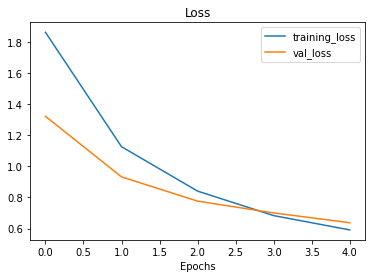

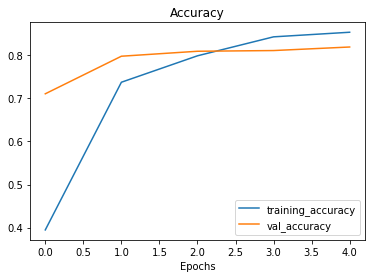

In [ ]:
plot_loss_curves(hist_0)

# Model_1
1% of training data with data augmentation

In [7]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")
walk_through_dir("10_food_classes_1_percent")
train_dir_1per='10_food_classes_1_percent/train'
test_dir_1per="10_food_classes_1_percent/test"

--2022-07-20 23:18:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   236MB/s    in 0.5s    

2022-07-20 23:18:58 (236 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_p

In [12]:
train_data_1per = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1per,
                                                                      label_mode='categorical',
                                                                      image_size=IMG_SIZE,
                                                                      batch_size=BATCH_SIZE)
test_data_1per = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1per,
                                                                     label_mode='categorical',
                                                                     image_size=IMG_SIZE,
                                                                     batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [13]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    # preprocessing.Rescaling(1./255.),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
], name='data_augmentation')

(-0.5, 473.5, 573.5, -0.5)

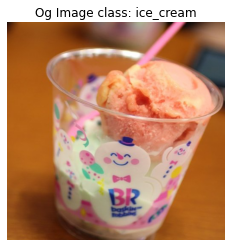

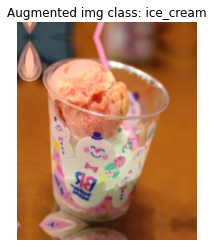

In [14]:
# Visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class=random.choice(train_data_1per.class_names)
target_dir=train_dir_1per+'/'+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+'/'+random_image

#read and plot
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Og Image class: {target_class}')
plt.axis(False);

# Augmented
augmented_img = data_augmentation(img,training=True)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f'Augmented img class: {target_class}')
plt.axis(False)

In [22]:
# Feature extraction on 1% data with data augmentation

input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs = tf.keras.layers.Input(shape=input_shape,name='input_layer')
x=data_augmentation(inputs,training=True)
x=base_model(x, training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)
outputs=tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
model_1=tf.keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

hist_1=model_1.fit(train_data_1per,
            epochs=5,
            steps_per_epoch=len(train_data_1per),
            validation_data=test_data_1per,
            validation_steps=int(0.25*len(test_data_1per)),
            callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                   experiment_name='1_per_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_per_data_aug/20220720-233609
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 2.5097 - accuracy: 0.0571WARNING:tensorflow:Model was constructed with shape (512, 512, 3) for input KerasTensor(type_spec=TensorSpec(shape=(512, 512, 3), dtype=tf.uint8, name='random_flip_input'), name='random_flip_input', description="created by layer 'random_flip_input'"), but it was called on an input with incompatible shape (None, 224, 224, 3).


3/3 [==============================] - 13s 3s/step - loss: 2.5097 - accuracy: 0.0571 - val_loss: 2.3545 - val_accuracy: 0.1217
Epoch 2/5
3/3 [==============================] - 6s 3s/step - loss: 2.2010 - accuracy: 0.2429 - val_loss: 2.2355 - val_accuracy: 0.1826
Epoch 3/5
3/3 [==============================] - 6s 3s/step - loss: 2.0163 - accuracy: 0.3143 - val_loss: 2.1392 - val_accuracy: 0.2352
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.8737 - accuracy: 0.4714 - val_loss: 2.0625 - val_accuracy: 0.2747
Epoch 5/5
3/3 [==============================] - 6s 3s/step - loss: 1.6936 - accuracy: 0.6714 - val_loss: 1.9775 - val_accuracy: 0.3372


In [23]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [25]:
model_1.evaluate(test_data_1per)

79/79 [==============================] - 18s 221ms/step - loss: 1.9691 - accuracy: 0.3204


[1.969055414199829, 0.3203999996185303]

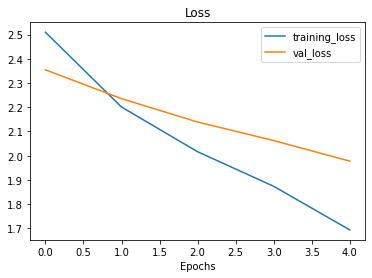

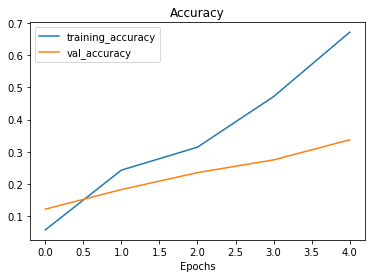

In [26]:
plot_loss_curves(hist_1)

# Model_2

In [33]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                      label_mode='categorical',
                                                      image_size=IMG_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                      label_mode='categorical',
                                                      image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [34]:
data_augmentation=tf.keras.Sequential([
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
], name='data_augmentaion')

In [37]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=input_shape, name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='glbavgpooling_layer')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)
model_2=tf.keras.Model(inputs,outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [38]:
checkpoint_path='tenper_checkpoint_weights/checkpoint.ckpt'
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq='epoch',
                                                       verbose=1)

In [40]:
initial_epochs=5
hist_2=model_2.fit(train_data,
                   epochs=initial_epochs,
                   validation_data=test_data,
                   validation_steps=int(0.25*len(test_data)),
                   callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                          experiment_name='callbacks'),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/callbacks/20220721-000227
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0717 - accuracy: 0.3027
Epoch 1: saving model to tenper_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 16s 442ms/step - loss: 2.0717 - accuracy: 0.3027 - val_loss: 1.5634 - val_accuracy: 0.6020
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4078 - accuracy: 0.6573
Epoch 2: saving model to tenper_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 9s 378ms/step - loss: 1.4078 - accuracy: 0.6573 - val_loss: 1.0948 - val_accuracy: 0.7632
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0964 - accuracy: 0.7547
Epoch 3: saving model to tenper_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 9s 338ms/step - loss: 1.0964 - accuracy: 0.7547 - val_loss: 0.8947 - val_accuracy: 0.7796
Epoch 4/5
24/24 [==============================] 

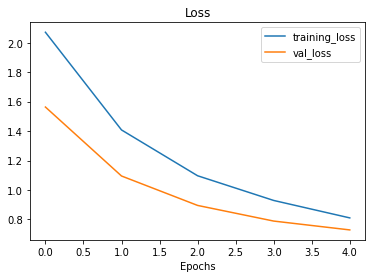

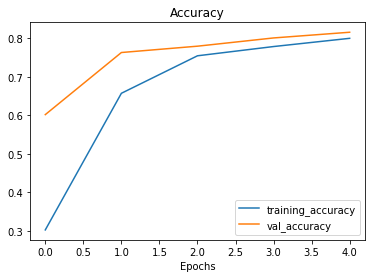

In [41]:
plot_loss_curves(hist_2)

In [42]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.6958 - accuracy: 0.8192


[0.6957500576972961, 0.8191999793052673]

In [43]:
# Loading checkpoint weights
model_2.load_weights(checkpoint_path)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.6958 - accuracy: 0.8192


[0.6957502365112305, 0.8191999793052673]

# Model_3

Fine Tuning by unfreezing layers

In [44]:
model_2.layers

In [45]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f371ad448d0> True
<keras.engine.sequential.Sequential object at 0x7f388a635290> True
<keras.engine.functional.Functional object at 0x7f371a053250> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f371afba310> True
<keras.layers.core.dense.Dense object at 0x7f371a433710> True


In [ ]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

In [47]:
base_model.trainable=True
for layer in base_model.layers[:-10]:
  layer.trainable=False

#Recompile
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # When fine tuning, typicall lower learning rate by 10x*
                # UML fit paper
                metrics=['accuracy'])

In [ ]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

In [49]:
print(len(model_2.trainable_variables))

12


In [59]:
# fine tune for another 5 epochs
fine_tune_epochs=initial_epochs+5

hist_2_1=model_2.fit(train_data,
                     epochs=fine_tune_epochs,
                     validation_data=test_data,
                     validation_steps=int(0.25*len(test_data)),
                     initial_epoch=hist_2.epoch[-1],
                     callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                            experiment_name='fine_tune')])

Saving TensorBoard log files to: transfer_learning/fine_tune/20220721-003230
Epoch 5/10
24/24 [==============================] - 17s 430ms/step - loss: 0.7008 - accuracy: 0.8067 - val_loss: 0.5929 - val_accuracy: 0.8059
Epoch 6/10
24/24 [==============================] - 7s 286ms/step - loss: 0.5855 - accuracy: 0.8133 - val_loss: 0.5288 - val_accuracy: 0.8306
Epoch 7/10
24/24 [==============================] - 7s 293ms/step - loss: 0.4853 - accuracy: 0.8480 - val_loss: 0.5530 - val_accuracy: 0.8141
Epoch 8/10
24/24 [==============================] - 7s 272ms/step - loss: 0.4594 - accuracy: 0.8520 - val_loss: 0.5456 - val_accuracy: 0.8240
Epoch 9/10
24/24 [==============================] - 9s 374ms/step - loss: 0.4021 - accuracy: 0.8813 - val_loss: 0.4781 - val_accuracy: 0.8339
Epoch 10/10
24/24 [==============================] - 9s 334ms/step - loss: 0.3618 - accuracy: 0.8893 - val_loss: 0.5060 - val_accuracy: 0.8339


In [60]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.4926 - accuracy: 0.8392


[0.49262696504592896, 0.8392000198364258]

In [68]:
def compare_historys(og_hist, new_hist, initial_epochs=5):
  '''
  Compare 2 histories
  '''
  #og_hist
  acc=og_hist.history['accuracy']
  loss=og_hist.history['loss']
  val_loss=og_hist.history['val_loss']
  val_acc=og_hist.history['val_accuracy']
  #total
  total_acc=acc+new_hist.history['accuracy']
  total_loss=loss+new_hist.history['loss']
  total_val_loss=val_loss+new_hist.history['val_loss']
  total_val_acc=val_acc+new_hist.history['val_accuracy']
  #plot for accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label='training_accuracy')
  plt.plot(total_val_acc, label='validation_accuracy')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(),label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and validation accuracy')
  #plot for loss
  plt.subplot(2,1,2)
  plt.plot(total_loss,label='training_loss')
  plt.plot(total_val_loss, label='validation_loss')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(),label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and validation loss')


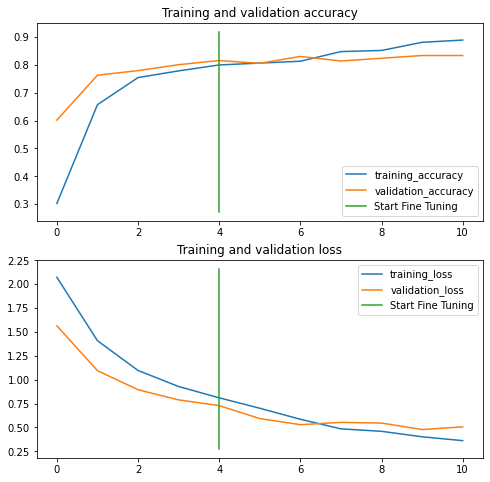

In [69]:
compare_historys(hist_2,hist_2_1)

# Model_4
More data

In [70]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")
walk_through_dir("10_food_classes_all_data")
train_dir_all='10_food_classes_all_data/train'
test_dir_all="10_food_classes_all_data/test"

--2022-07-21 00:48:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   133MB/s    in 3.7s    

2022-07-21 00:48:37 (133 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_d

In [73]:
IMG_SIZE=(224,224)
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all,
                                                                     label_mode='categorical',
                                                                     image_size=IMG_SIZE)
test_data_all=tf.keras.preprocessing.image_dataset_from_directory(test_dir_all,
                                                                  label_mode='categorical',
                                                                  image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [74]:
# Fine tune from feature extraction level
model_2.load_weights(checkpoint_path)

In [75]:
# Recompile
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [76]:
fine_tune_epochs=initial_epochs+5
hist_2_2 = model_2.fit(train_data_all,
                       epochs=fine_tune_epochs,
                       validation_data=test_data_all,
                       validation_steps=int(0.25*len(test_data)),
                       initial_epoch=hist_2.epoch[-1],
                       callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                              experiment_name='fine_tune_alldata')])

Saving TensorBoard log files to: transfer_learning/fine_tune_alldata/20220721-010039
Epoch 5/10
235/235 [==============================] - 55s 200ms/step - loss: 0.7185 - accuracy: 0.7740 - val_loss: 0.3408 - val_accuracy: 0.8914
Epoch 6/10
235/235 [==============================] - 42s 176ms/step - loss: 0.5873 - accuracy: 0.8108 - val_loss: 0.3442 - val_accuracy: 0.8898
Epoch 7/10
235/235 [==============================] - 43s 181ms/step - loss: 0.5242 - accuracy: 0.8303 - val_loss: 0.2835 - val_accuracy: 0.9095
Epoch 8/10
235/235 [==============================] - 42s 175ms/step - loss: 0.4778 - accuracy: 0.8461 - val_loss: 0.3067 - val_accuracy: 0.9013
Epoch 9/10
235/235 [==============================] - 36s 154ms/step - loss: 0.4281 - accuracy: 0.8632 - val_loss: 0.2869 - val_accuracy: 0.9079
Epoch 10/10
235/235 [==============================] - 37s 155ms/step - loss: 0.4143 - accuracy: 0.8684 - val_loss: 0.2787 - val_accuracy: 0.9112


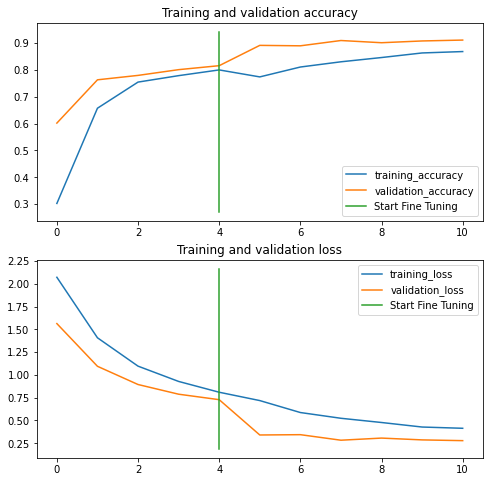

In [77]:
compare_historys(hist_2,hist_2_2)

# Viewing experiments on Tensorboard

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name 'Trasfer learning' \
  --description 'Comparing all models' \
  --one_shot


In [ ]:
!tensorboard dev list

In [ ]:
!tensorboard dev delete --experiment_id xxxxxx